# CPI Analysis and Prediction

[Dataset source](https://data.gov.ie/dataset/cpm03-consumer-price-index)

This dataset holds Consumer Price Index (CPI) data for Ireland across various different sub-indicies, such as Alcohol and Tobacco. The goal is to create a linear regression model to predict CPI rise/fall in the coming years. In the case of this model, I will be focusing on the rise of cost of alcohol according to the CPI data.

The CPI data is split into different sub-categories for alcohol. There are 'Bases' that are used to judge how much a product has risen or fallen in price. For example, if the base is set to 100 for the year 2011 and the CPI for alcohol in 2015 was 110, then that is a 10% rise in cost for alcohol since 2011.

The dataset has the following headings: "STATISTIC","Statistic Label","TLIST(M1)","Month","C01797V02862","Selected Sub Indices","UNIT","VALUE"

* **STATISTIC** seems to be irrelevant for our use case as it seems to just identify the dataset, so it can be dropped.
* **Statistic Label** not important for our use case and can be dropped as it is purely for description. It seems to be only saying "Consumer Price Index" and the current base, which we already know.
* **TLIST** seems unimportant. I could not find any use case for it, so it can be dropped.
* **Month** is important. It is used for the X axis of our charts, so it is kept.
* **C01797V02862** is unusual. I was looking for an explanation behind it on the data.gov.ie website, but I could not seem to find one. It could be different sub-categories of the sub-indicies, but that's just a guess. It is being dropped from the dataset anyway as it is not used.
* **Selected Sub Indices** is important. It is what we use to get only alcohol data from the dataset.
* **UNIT** is important, it is what allows us to select the base used.
* **VALUE** is important, it is the raw data and acts as the Y axis of our charts.

**Disclaimer**  
ChatGPT was used throughout this project as a tool to help understand the data as well as the algorithms/libraries used. 

**Additional Information for Submission**  
**Data Sources**  
The data was taken from [data.gov.ie](data.gov.ie). It is a dataset full of CPI data spanning from 1980s to 2024. CPI is the Consumer Price Index and is used to estimate the rate of inflation of certain products.

**Data Pre-Processing**  
The data was cleaned of unnecessary items. I only took information regarding Alcohol, so a lot of the dataset was removed. I also remove unnecessary columns, which I spoke in more detail about above.

**Algorithms**  
Linear regression was used for this project. This was taken from sklearn.

**Tools & TEch Used**
* Python
* Scikit-Learn for regression models
* Matplotlib for plotting
* Pandas for data manipulation

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV data into a dataframe
file_path = '../datasets/CPM03.20241010092932.csv'
df_cpi = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df_cpi.head(10)

,STATISTIC,Statistic Label,TLIST(M1),Month,C01797V02862,Selected Sub Indices,UNIT,VALUE
0,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,1,Alcohol,Base Dec 2023=100,NaN
1,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,2,Tobacco,Base Dec 2023=100,NaN
2,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,A,CPI excluding Tobacco,Base Dec 2023=100,NaN
3,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,B,CPI excluding Housing,Base Dec 2023=100,NaN
4,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,C,CPI excluding Mortgage Interest,Base Dec 2023=100,NaN
5,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,D,CPI excluding Energy Products,Base Dec 2023=100,NaN
6,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,E,Energy Products,Base Dec 2023=100,NaN
7,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,G,Goods,Base Dec 2023=100,NaN
8,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,H,CPI excluding Energy and Unprocessed Food,Base Dec 2023=100,NaN
9,CPM03C08,Consumer Price Index (Base Dec 2023=100),197511,1975 November,I,Services excluding Mortgage Interest,Base Dec 2023=100,NaN


Here we load the data and then get the shape of the data and a description of it. It serves as a good starting point to help us understand what our data holds.


In [27]:
# Print the shape of the dataframe
print("Shape of the dataframe:", df_cpi.shape)

# Describe the dataframe
print("Description of the dataframe:")
print(df_cpi.describe(include='all'))

Shape of the dataframe: (65632, 8)
Description of the dataframe:
       STATISTIC                           Statistic Label      TLIST(M1)  \
count      65632                                     65632   65632.000000   
unique         8                                         8            NaN   
top     CPM03C08  Consumer Price Index (Base Dec 2023=100)            NaN   
freq        8204                                      8204            NaN   
mean         NaN                                       NaN  199981.575085   
std          NaN                                       NaN    1409.980203   
min          NaN                                       NaN  197511.000000   
25%          NaN                                       NaN  198801.000000   
50%          NaN                                       NaN  200003.500000   
75%          NaN                                       NaN  201206.000000   
max          NaN                                       NaN  202408.000000   

          

Here we can see that quite an amount of the VALUE column is N/A. It is easier, and likely better, to drop this data from the dataset rather than trying to fill it with other values such as the mean or median values.

In [28]:
# Print the amount of NaN values in each column
print("Amount of NaN values in each column:")
print(df_cpi.isna().sum())

Amount of NaN values in each column:
STATISTIC                   0
Statistic Label             0
TLIST(M1)                   0
Month                       0
C01797V02862                0
Selected Sub Indices        0
UNIT                        0
VALUE                   15167
dtype: int64


In [29]:
df_cpi = df_cpi.dropna()

# Print the amount of NaN values in each column
print("Amount of NaN values in each column:")
print(df_cpi.isna().sum())
print("Shape of the dataframe:", df_cpi.shape)

Amount of NaN values in each column:
STATISTIC               0
Statistic Label         0
TLIST(M1)               0
Month                   0
C01797V02862            0
Selected Sub Indices    0
UNIT                    0
VALUE                   0
dtype: int64
Shape of the dataframe: (50465, 8)


At this point we go ahead and drop the unnecessary columns which we discussed at the beginning of this notebook. We are left with Month, Selected Sub Indices, UNIT and VALUE.

In [30]:
# Get alcohol data

# Filter the data for the 'Alcohol' sub-index
alcohol_data = df_cpi[["Month", "Selected Sub Indices", "UNIT", "VALUE"]]
alcohol_data = alcohol_data[df_cpi['Selected Sub Indices'] == 'Alcohol']
alcohol_data.head(10)


,Month,Selected Sub Indices,UNIT,VALUE
5222,2006 December,Alcohol,Base Dec 2023=100,75.5
5236,2007 January,Alcohol,Base Dec 2023=100,75.9
5250,2007 February,Alcohol,Base Dec 2023=100,75.9
5264,2007 March,Alcohol,Base Dec 2023=100,76.7
5278,2007 April,Alcohol,Base Dec 2023=100,77.3
5292,2007 May,Alcohol,Base Dec 2023=100,77.5
5306,2007 June,Alcohol,Base Dec 2023=100,77.7
5320,2007 July,Alcohol,Base Dec 2023=100,77.7
5334,2007 August,Alcohol,Base Dec 2023=100,77.8
5348,2007 September,Alcohol,Base Dec 2023=100,77.8


Here we isolate the data to just the base of 2023/100 and then do a quick check to ensure that data looks correct. The next step is to plot the data to visualise it.

In [31]:
# Filter the data to focus on the entries with "Base Dec 2023=100"
filtered_alcohol_data = alcohol_data[alcohol_data['UNIT'] == 'Base Dec 2023=100']
filtered_alcohol_data.head(10)

,Month,Selected Sub Indices,UNIT,VALUE
5222,2006 December,Alcohol,Base Dec 2023=100,75.5
5236,2007 January,Alcohol,Base Dec 2023=100,75.9
5250,2007 February,Alcohol,Base Dec 2023=100,75.9
5264,2007 March,Alcohol,Base Dec 2023=100,76.7
5278,2007 April,Alcohol,Base Dec 2023=100,77.3
5292,2007 May,Alcohol,Base Dec 2023=100,77.5
5306,2007 June,Alcohol,Base Dec 2023=100,77.7
5320,2007 July,Alcohol,Base Dec 2023=100,77.7
5334,2007 August,Alcohol,Base Dec 2023=100,77.8
5348,2007 September,Alcohol,Base Dec 2023=100,77.8


In [32]:
base_map = {
    2023: 'Dec 2023=100',
    2016: 'Dec 2016=100',
    2011: 'Dec 2011=100',
    2006: 'Dec 2006=100',
    2001: 'Dec 2001=100',
    1996: 'Nov 1996=100'
}

base_years = [2023, 2016, 2011, 2006, 2001, 1996]

# Create a dictionary to hold the filtered dataframes for each base year
filtered_dataframes = {}

# Loop through each base year and filter the data
for base in base_years:
    filtered_dataframes[base] = alcohol_data[alcohol_data['UNIT'] == f'Base {base_map[base]}']

# Print the shape of each filtered dataframe
for base, df in filtered_dataframes.items():
    print(f"Shape of the dataframe for {base_map[base]}: {df.shape}")

Shape of the dataframe for Dec 2023=100: (213, 4)
Shape of the dataframe for Dec 2016=100: (334, 4)
Shape of the dataframe for Dec 2011=100: (502, 4)
Shape of the dataframe for Dec 2006=100: (586, 4)
Shape of the dataframe for Dec 2001=100: (585, 4)
Shape of the dataframe for Nov 1996=100: (585, 4)


This is an example of the data being displayed on a chart after it has been cleaned and processed. We can see a steady rise in the cost of alcohol from 1976 to 2024. The red line is an indicator of whether or not the price of alcohol has risen or not, relative to the base. If the blue line rises above the red line, then we can say that the price has increased.

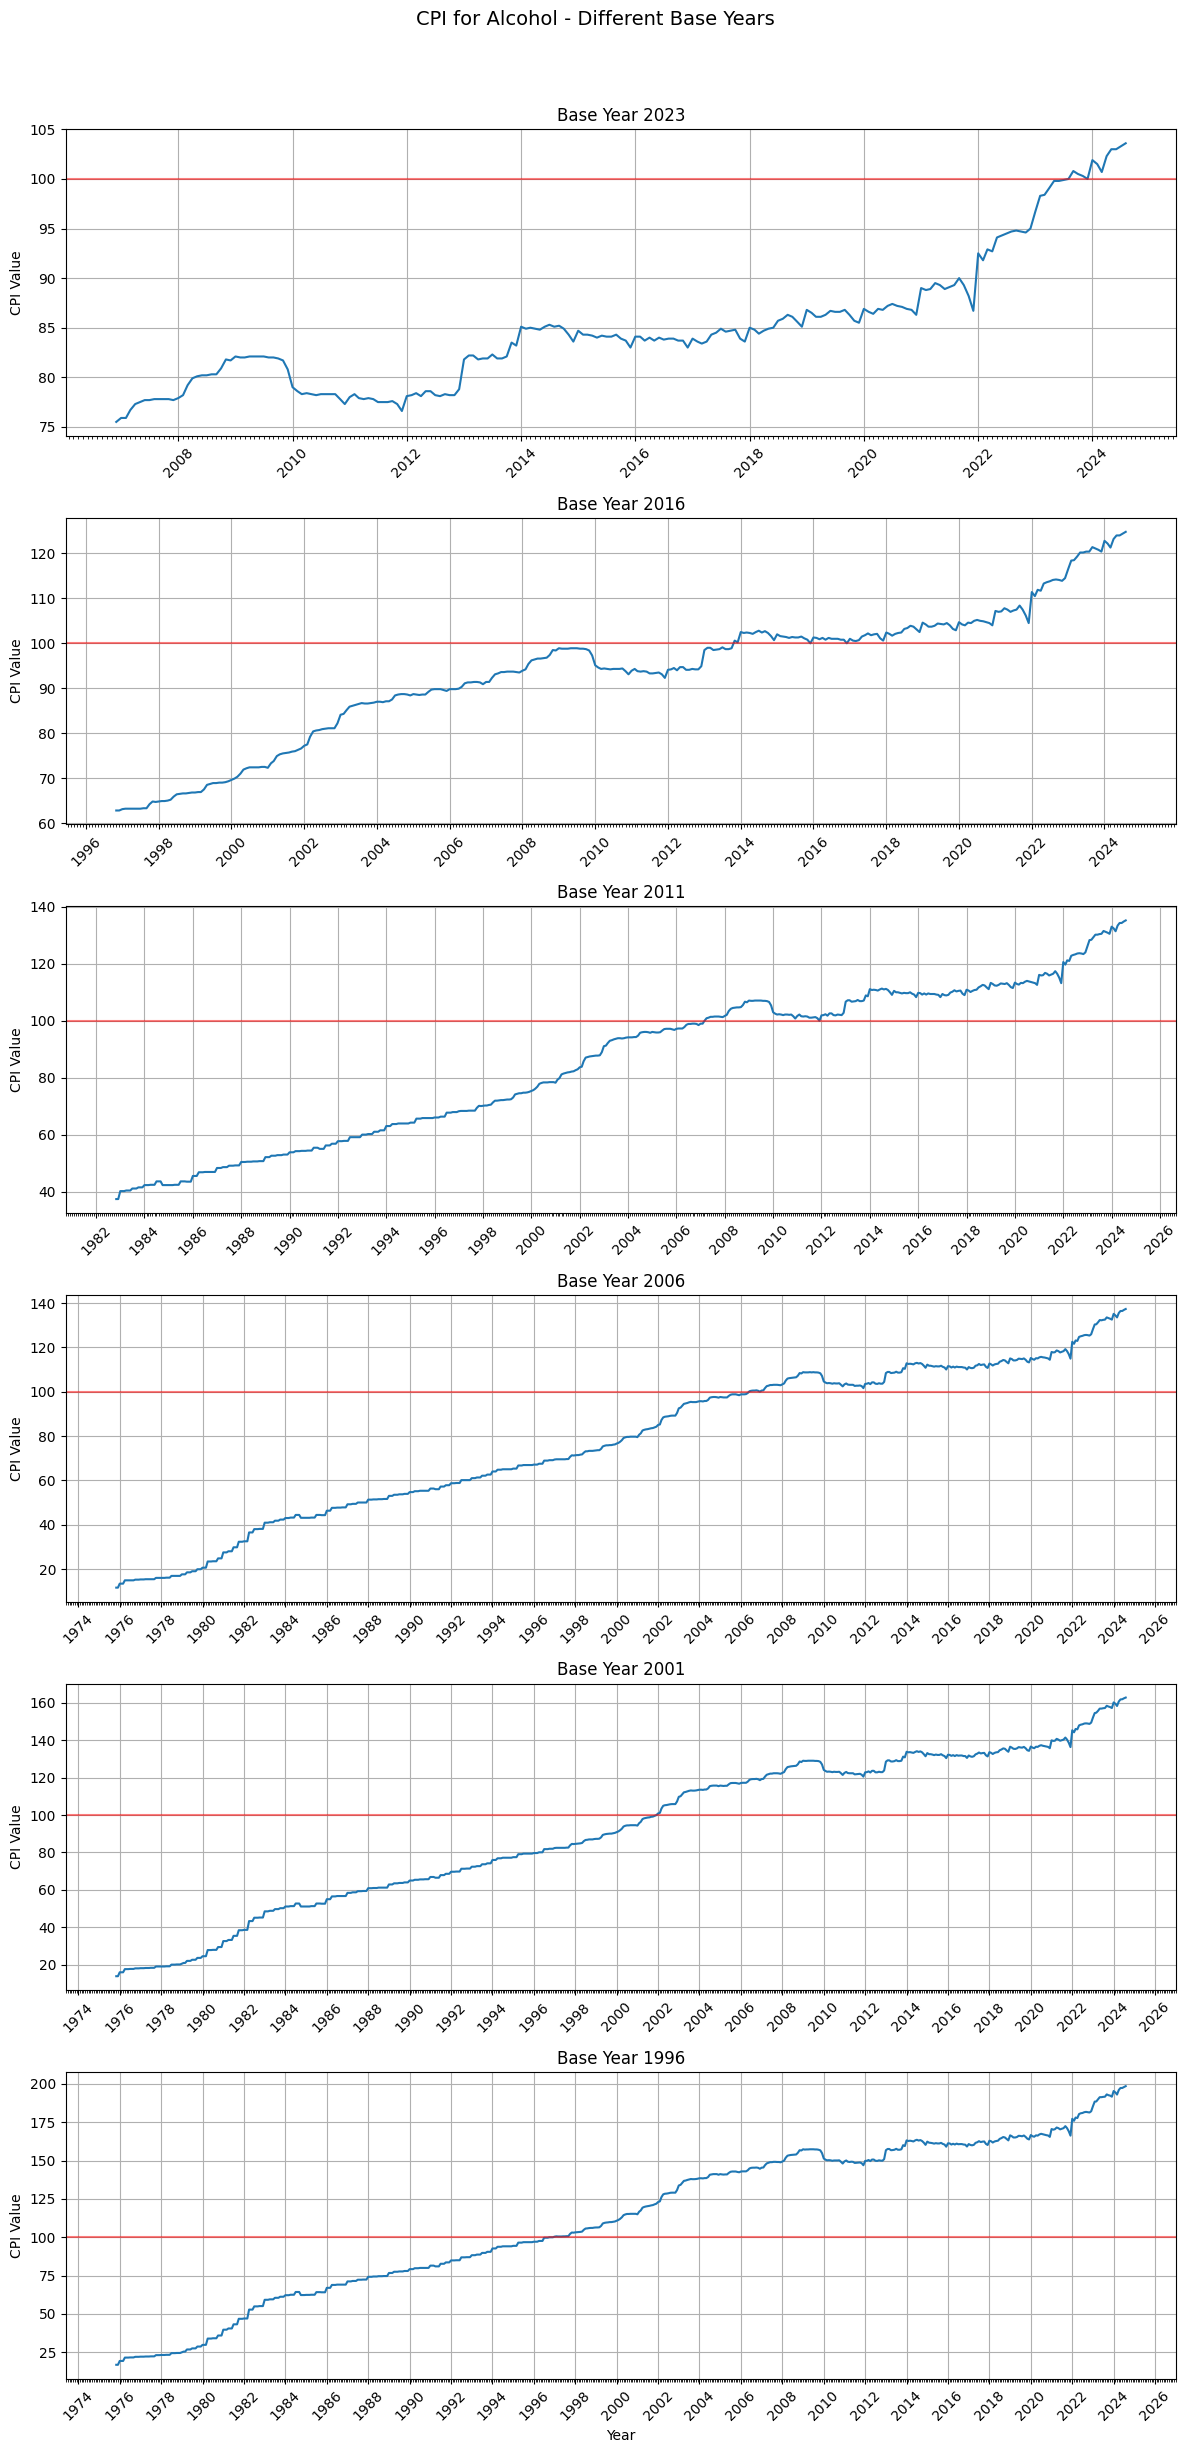

In [33]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Calculate number of subplots needed
n_plots = len(filtered_dataframes)

# Create figure and subplots - make it tall enough to accommodate all plots
fig, axes = plt.subplots(n_plots, 1, figsize=(12, 4*n_plots))

# Plot each dataframe in its own subplot
for (base_year, df), ax in zip(filtered_dataframes.items(), axes):
    # Convert Month to datetime if not already
    df.loc[:, 'Month'] = pd.to_datetime(df['Month'], format='%Y %B')
    
    # Plot the data
    ax.plot(df['Month'], df['VALUE'])

    # Add horizontal red line at y=100
    ax.axhline(y=100, color='red', linestyle='-', alpha=0.5)
    
    # Set major ticks for every 2 years
    ax.xaxis.set_major_locator(mdates.YearLocator(2))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    # Rotate x-axis labels
    ax.tick_params(axis='x', rotation=45)
    
    # Add grid
    ax.grid(True)
    
    # Add title for each subplot
    ax.set_title(f'Base Year {base_year}')
    
    # Add y-label
    ax.set_ylabel('CPI Value')

# Add x-label only to bottom subplot
axes[-1].set_xlabel('Year')

# Add overall title
fig.suptitle('CPI for Alcohol - Different Base Years', y=1.02, fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Time to train a model. We are going to use a linear regression model in this case, but the linear regression model might not be suited for some cases. For example, looking at the base year of 2023, the line is more of a slight upward curve, so maybe a polynomial regression would be better. But this could also be an issue with a lack of data, as if you look at the bases of 1996 or 2001, there is far more data points. This allows us to make more accurate predictions with a linear regression model. I will create a model from 1996 and 2023 to see the difference in R^2 score.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Get the dataframes for the base years 2023 and 1996
df_2023 = filtered_dataframes[2023]
df_1996 = filtered_dataframes[1996]

# Convert 'Month' from datetime object to just years and store in 'Years'
df_2023.loc[:, 'Years'] = pd.to_datetime(df_2023['Month']).dt.year
X_2023 = df_2023['Years'].values.reshape(-1, 1)
y_2023 = df_2023['VALUE']

df_1996.loc[:, 'Years'] = pd.to_datetime(df_1996['Month']).dt.year
X_1996 = df_1996['Years'].values.reshape(-1, 1)
y_1996 = df_1996['VALUE']

# Split the data into training and testing sets
X_train_2023, X_test_2023, y_train_2023, y_test_2023 = train_test_split(X_2023, y_2023, test_size=0.2, random_state=128940933)
X_train_1996, X_test_1996, y_train_1996, y_test_1996 = train_test_split(X_1996, y_1996, test_size=0.2, random_state=127612398)

# Create the linear regression model
model_2023 = LinearRegression()
model_1996 = LinearRegression()

# Train the model
model_2023.fit(X_train_2023, y_train_2023)
model_1996.fit(X_train_1996, y_train_1996)

# Calculate R^2 score for the model
r2_score_2023 = model_2023.score(X_test_2023, y_test_2023)
r2_score_1996 = model_1996.score(X_test_1996, y_test_1996)

print(f"R^2 Score for 2023 model: {r2_score_2023}")
print(f"R^2 Score for 1996 model: {r2_score_1996}")

R^2 Score for 2023 model: 0.7481776066030812
R^2 Score for 1996 model: 0.9716090889722919


/tmp/ipykernel_6213/2612554547.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023.loc[:, 'Years'] = pd.to_datetime(df_2023['Month']).dt.year
/tmp/ipykernel_6213/2612554547.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1996.loc[:, 'Years'] = pd.to_datetime(df_1996['Month']).dt.year


As we can see, the R^2 score on the 1996 base is far better than on the 2023 model. This is because of the slight upward curve in 2023 and/or the volume of data in 1996 compared to 2023. For the rest of our predictions, I will be using the 1996 model.

Let's verify the Linear Regression model. We can do this by generating a line based on the test dataset as an input.

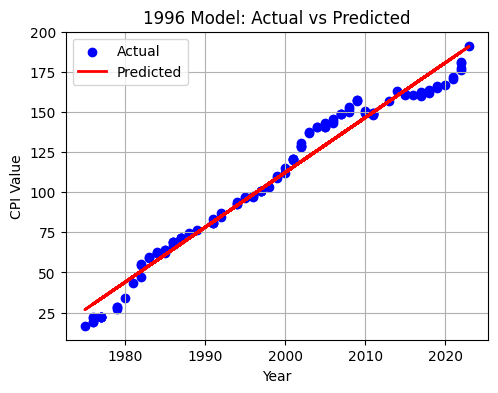

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Predict the values for the test dataset
y_pred_1996 = model_1996.predict(X_test_1996)

# Plot the results
plt.figure(figsize=(12, 4))

# Plot for 1996 model
plt.subplot(1, 2, 1)
plt.scatter(X_test_1996, y_test_1996, color='blue', label='Actual')
plt.plot(X_test_1996, y_pred_1996, color='red', linewidth=2, label='Predicted')
plt.xlabel('Year')
plt.ylabel('CPI Value')
plt.title('1996 Model: Actual vs Predicted')
plt.legend()
plt.grid(True)

plt.show()

Now let's go ahead and make our predictions for the next 20 years. We can see a steady rise in the price of alcohol which closely follows the pattern from the last 40+ years.

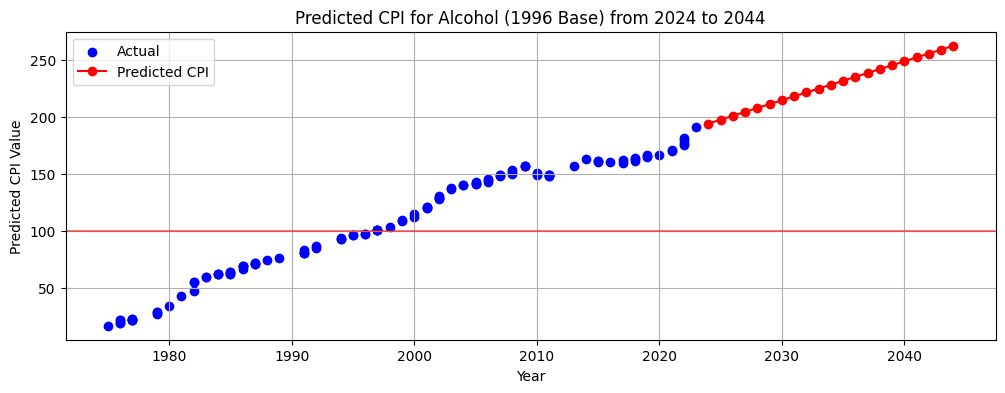

In [36]:
import numpy as np

# Create an array of years from 2024 to 2044
future_years = np.arange(2024, 2045).reshape(-1, 1)

y_prediction = model_1996.predict(future_years)

# Plot the predictions
plt.figure(figsize=(12, 4))
plt.scatter(X_test_1996, y_test_1996, color='blue', label='Actual')
plt.plot(future_years, y_prediction, label='Predicted CPI', color='red', marker='o')
plt.axhline(y=100, color='red', linestyle='-', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Predicted CPI Value')
plt.title('Predicted CPI for Alcohol (1996 Base) from 2024 to 2044')
plt.grid(True)
plt.legend()
plt.show()

Let's get a numeric representation of how much we can expect the price of alcohol to rise relative to 1996.

In [37]:
predicted_year = 2040
prediction = model_1996.predict([[predicted_year]])
print(f"Predicted CPI for Alcohol in {predicted_year}: {prediction[0]}")
print(f"This is a {(prediction[0] % 100):.2f}% rise in CPI from the base year 1996.")

Predicted CPI for Alcohol in 2040: 249.13441825228892
This is a 49.13% rise in CPI from the base year 1996.
